In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

## Regression and residual plots
- Linear regression is a useful tool for understanding the relationship between numerical variables. Seaborn has simple but powerful tools for examining these relationships.

- For these exercises, we will look at some details from the US Department of Education on 4 year college tuition information and see if there are any interesting insights into which variables might help predict tuition costs.

- For these exercises, all data is loaded in the df variable.

In [3]:
# Read in the DataFrame
df = pd.read_csv("dataset/college_datav3.csv", index_col=0)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6702 entries, Alabama A & M University to High Desert Medical College
Data columns (total 23 columns):
OPEID               6702 non-null int64
REGION              6702 non-null int64
SAT_AVG_ALL         1387 non-null float64
PCTPELL             6066 non-null float64
PCTFLOAN            6066 non-null float64
ADM_RATE_ALL        2180 non-null float64
UG                  4367 non-null float64
AVGFACSAL           4104 non-null float64
COMPL_RPY_5YR_RT    5708 non-null object
DEBT_MDN            6681 non-null object
MEDIAN_HH_INC       4993 non-null object
ICLEVEL             6702 non-null int64
HIGHDEG             6702 non-null int64
CONTROL             6702 non-null int64
WOMENONLY           6368 non-null float64
MENONLY             6368 non-null float64
LOCALE              6368 non-null float64
Tuition             5735 non-null float64
Degree_Type         6702 non-null object
Ownership           6702 non-null object
Regions             6702 no

In [4]:
df.head()

,OPEID,REGION,SAT_AVG_ALL,PCTPELL,PCTFLOAN,ADM_RATE_ALL,UG,AVGFACSAL,COMPL_RPY_5YR_RT,DEBT_MDN,...,CONTROL,WOMENONLY,MENONLY,LOCALE,Tuition,Degree_Type,Ownership,Regions,Locales,Locale_Short
INSTNM,,,,,,,,,,,,,,,,,,,,,
Alabama A & M University,100200,5,850.0,0.7249,0.8159,0.653841,4380.0,7017.0,0.477631579,14600,...,1,0.0,0.0,12.0,13435.0,Graduate,Public,South East,City: Midsize,City
University of Alabama at Birmingham,105200,5,1147.0,0.3505,0.5218,0.604275,10331.0,10221.0,0.673230442,14250,...,1,0.0,0.0,12.0,16023.0,Graduate,Public,South East,City: Midsize,City
Amridge University,2503400,5,NaN,0.7455,0.8781,NaN,98.0,3217.0,0.636363636,11082,...,2,0.0,0.0,12.0,8862.0,Graduate,Private non-profit,South East,City: Midsize,City
University of Alabama in Huntsville,105500,5,1221.0,0.3179,0.4589,0.811971,5220.0,9514.0,0.762222222,15000,...,1,0.0,0.0,12.0,18661.0,Graduate,Public,South East,City: Midsize,City
Alabama State University,100500,5,844.0,0.7567,0.7692,0.463858,4348.0,7940.0,0.43006993,15274,...,1,0.0,0.0,12.0,7400.0,Graduate,Public,South East,City: Midsize,City


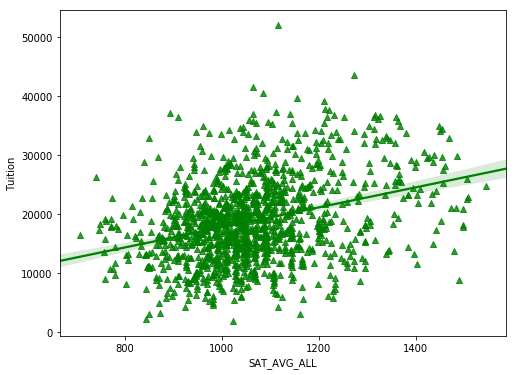

<Figure size 432x288 with 0 Axes>

In [7]:
# Display a regression plot for Tuition
plt.figure(figsize=(8,6))
sns.regplot(data=df,
            y='Tuition',
            x="SAT_AVG_ALL",
            marker='^',
            color='g')
plt.show()
plt.clf()

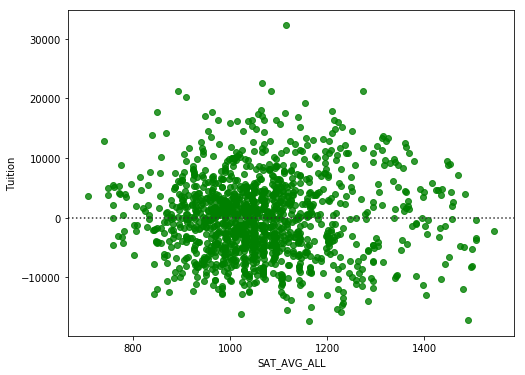

<Figure size 432x288 with 0 Axes>

In [20]:
# Display the residual plot
plt.figure(figsize=(8,6))
sns.residplot(data=df,
          y='Tuition',
          x="SAT_AVG_ALL",
          color='g')
plt.show()
plt.clf()

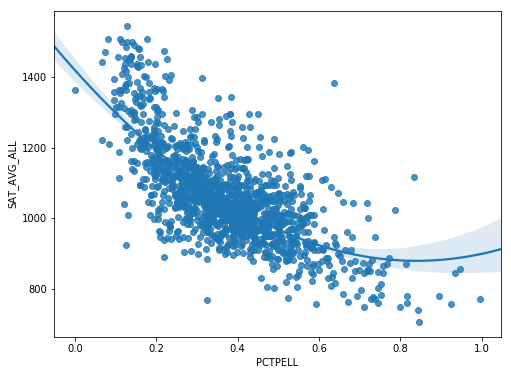

In [22]:
# polynomial regression 
plt.figure(figsize=(8,6))
sns.regplot(data=df, 
            x='PCTPELL', 
            y='SAT_AVG_ALL', 
            order=2)
plt.show()

## Regression plot parameters
- Seaborn's regression plot supports several parameters that can be used to configure the plots and drive more insight into the data.

- For the next exercise, we can look at the relationship between tuition and the percent of students that receive Pell grants. A Pell grant is based on student financial need and subsidized by the US Government. In this data set, each University has some percentage of students that receive these grants. Since this data is continuous, using x_bins can be useful to break the percentages into categories in order to summarize and understand the data.

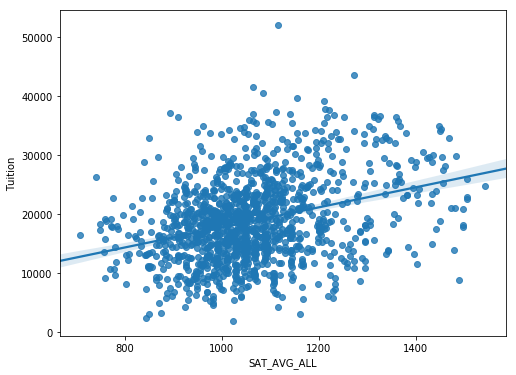

<Figure size 432x288 with 0 Axes>

In [21]:
# Plot a regression plot of Tuition 
# and the Percentage of Pell Grants
plt.figure(figsize=(8,6))
sns.regplot(data=df,
            y='Tuition',
            x="SAT_AVG_ALL")
plt.show()
plt.clf()

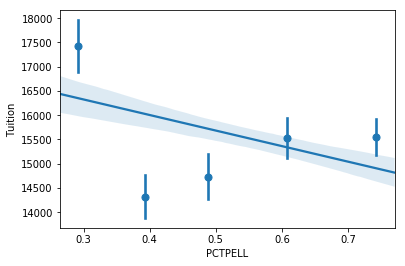

<Figure size 432x288 with 0 Axes>

In [12]:
# Create another plot that estimates the tuition by PCTPELL
sns.regplot(data=df,
            y='Tuition',
            x="PCTPELL",
            x_bins=5)

plt.show()
plt.clf()

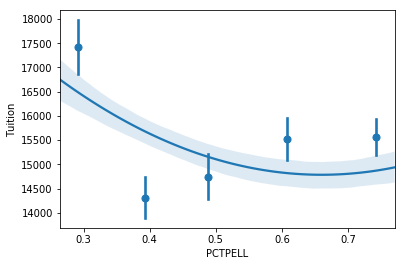

<Figure size 432x288 with 0 Axes>

In [13]:
# The final plot should include a line using a 2nd order polynomial
sns.regplot(data=df,
            y='Tuition',
            x="PCTPELL",
            x_bins=5,
            order=2)

plt.show()
plt.clf()

## Binning data
- When the data on the x axis is a continuous value, it can be useful to break it into different bins in order to get a better visualization of the changes in the data.
- For this exercise, we will look at the relationship between tuition and the Undergraduate population abbreviated as UG in this data. We will start by looking at a scatter plot of the data and examining the impact of different bin sizes on the visualization.

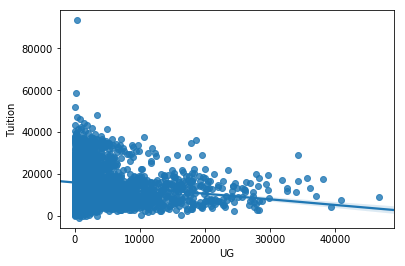

<Figure size 432x288 with 0 Axes>

In [14]:
# Create a scatter plot by disabling the regression line
sns.regplot(data=df,
            y='Tuition',
            x="UG",
            fit_reg=True)
plt.show()
plt.clf()

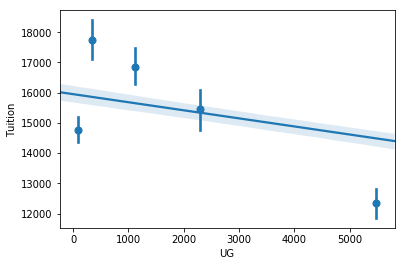

<Figure size 432x288 with 0 Axes>

In [15]:
# Create a scatter plot 
# and bin the data into 5 bins
sns.regplot(data=df,
            y='Tuition',
            x="UG",
            x_bins=5)
plt.show()
plt.clf()

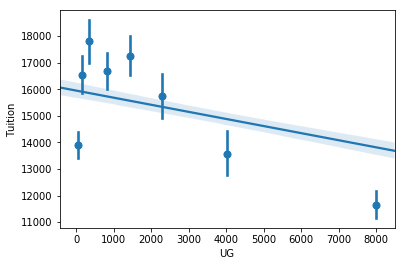

<Figure size 432x288 with 0 Axes>

In [16]:
# Create a regplot and bin the data into 8 bins
sns.regplot(data=df,
         y='Tuition',
         x="UG",
         x_bins=8)

plt.show()
plt.clf()

## correlation matrix

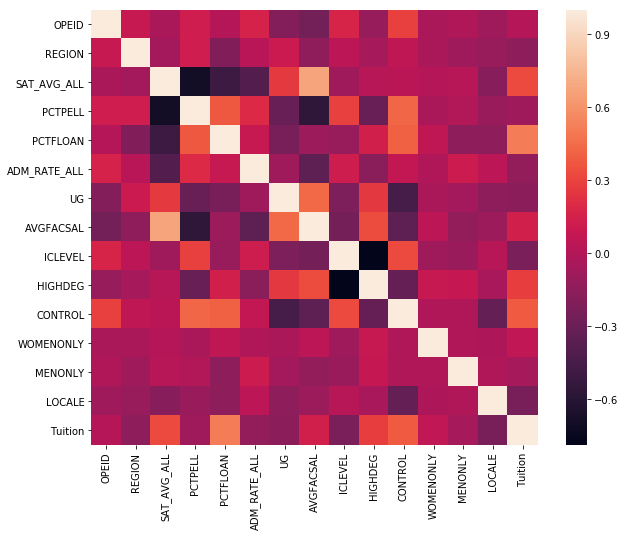

In [23]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr())
plt.show()